In [1]:
import pandas as pd

resenha = pd.read_csv("imdb-reviews-pt-br.csv")

resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 42
np.random.seed(SEED)

In [3]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
regressao_logistica = LogisticRegression()

# geram erros antes de vetorizar os textos
#regressao_logistica.fit(treino, classe_treino)

#acuracia = regressao_logistica.score(teste, classe_teste)
#print(acuracia)

In [6]:
print("Negativa \n")
resenha.text_pt[189]

Negativa 



'Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.'

In [7]:
print("Positiva \n")
resenha.text_pt[49002]

Positiva 



'Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você

In [8]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [9]:
classificacao = resenha["sentiment"].replace(['neg','pos'],[0,1])
resenha['classificacao'] = classificacao

In [10]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [11]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase = False)
bag_words = vetorizar.fit_transform(texto)

vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [14]:
bag_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [15]:
pd.__version__

'1.0.5'

In [16]:
# metodo novo pandas >= 0.25
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_words, columns = vetorizar.get_feature_names())
# metodo antigo
# matriz_esparsa = pd.SparseDataFrame(bag_words, columns = vetorizar.get_feature_names())
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [17]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_words.shape)

(49459, 50)


In [18]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_words, resenha.classificacao)

regressao_logistica.fit(treino, classe_treino)

acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6515163768701981


In [19]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase = False, max_features = 50)
    bag_words = vetorizar.fit_transform(texto[coluna_texto])
    
    regressao_logistica = LogisticRegression(solver = 'lbfgs')
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_words, texto[coluna_classificacao], random_state = 42)
    
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

print('Acuracia: %.2f' % classificar_texto(resenha, 'text_pt', 'classificacao'))
    

Acuracia: 0.66


In [20]:
%matplotlib inline

from wordcloud import WordCloud

In [21]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])
len(todas_palavras)

63448424

In [22]:
nuvem_palavras = WordCloud(width = 800, 
                           height = 500, 
                           max_font_size = 110,
                           collocations = False).generate(todas_palavras)

In [23]:
import matplotlib.pyplot as plt

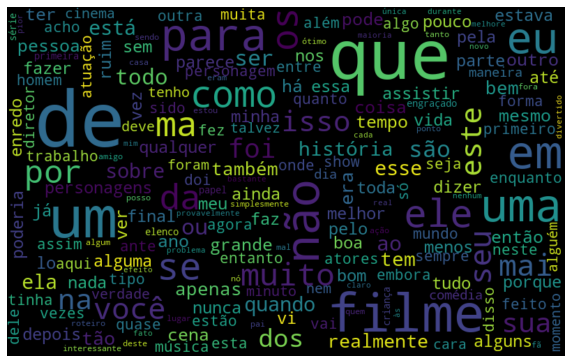

In [24]:
plt.figure(figsize = (10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [26]:
def nuvem_palavras(texto, coluna_texto, query_text):
    textoq = texto.query("sentiment == " + query_text)
    todas_palavras = ' '.join([texto for texto in textoq[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, 
                               height = 500, 
                               max_font_size = 110,
                               collocations = False).generate(todas_palavras)
    plt.figure(figsize = (10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

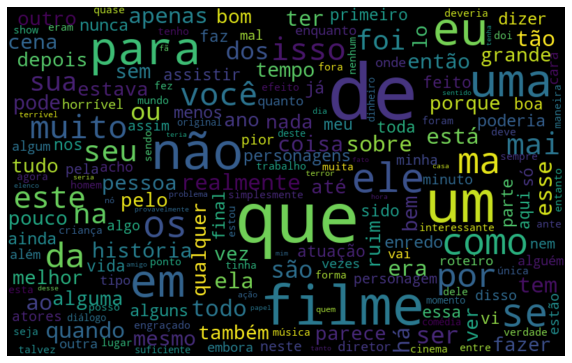

In [27]:
nuvem_palavras(resenha, 'text_pt', "'neg'")

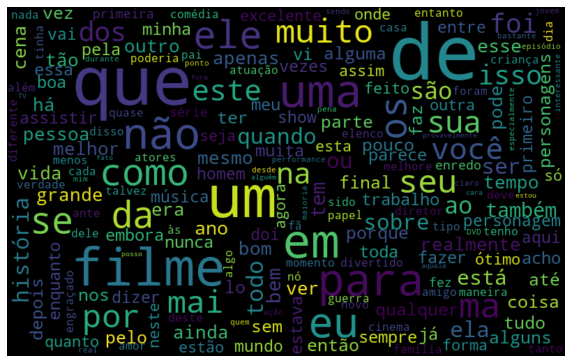

In [28]:
nuvem_palavras(resenha, 'text_pt', "'pos'")

In [29]:
import nltk
#nltk.download("all")

In [30]:
frase = ['um filme bom', 'um filme ruim']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [31]:
frequencia = nltk.FreqDist(' '.join(frase).split())
frequencia

FreqDist({'um': 2, 'filme': 2, 'bom': 1, 'ruim': 1})

In [32]:
from nltk import tokenize

In [33]:
frase = "bem vindo ao mundo do PLN"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

In [34]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [35]:
df_frequencia = pd.DataFrame({"Palavra" : list(frequencia.keys()), "Frequencia" : list(frequencia.values())  })
df_frequencia.head(10)

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
5,Costner,50
6,arrumou,3
7,um,216410
8,filme,117543
9,por,61339


In [36]:
df_frequencia.nlargest(columns = 'Frequencia', n = 10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [37]:
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

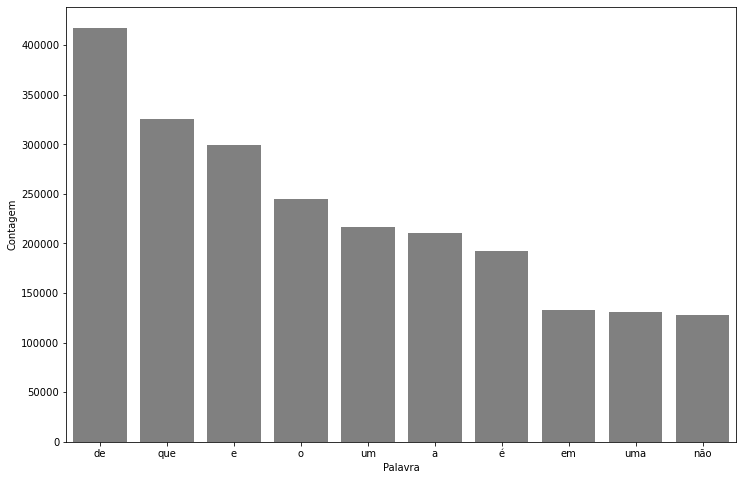

In [38]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df_frequencia.nlargest(columns = 'Frequencia', n = 10), 
                 x = 'Palavra', y = 'Frequencia', color = 'gray')
ax.set(yLabel = 'Contagem')
plt.show

In [39]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra" : list(frequencia.keys()), "Frequencia" : list(frequencia.values())  })
    df_frequencia = df_frequencia.nlargest(columns = 'Frequencia', n = quantidade)
    
    total = df_frequencia['Frequencia'].sum()
    df_frequencia['Porcentagem'] = df_frequencia['Frequencia'].cumsum() / total * 100
    
    plt.figure(figsize = (12,8))
    ax = sns.barplot(data = df_frequencia,
                     x = 'Palavra', y = 'Frequencia', color = 'gray')
    ax.set(yLabel = 'Contagem')
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequencia, x='Palavra', y='Porcentagem', color='red', sort=False, ax=ax2)
    plt.show

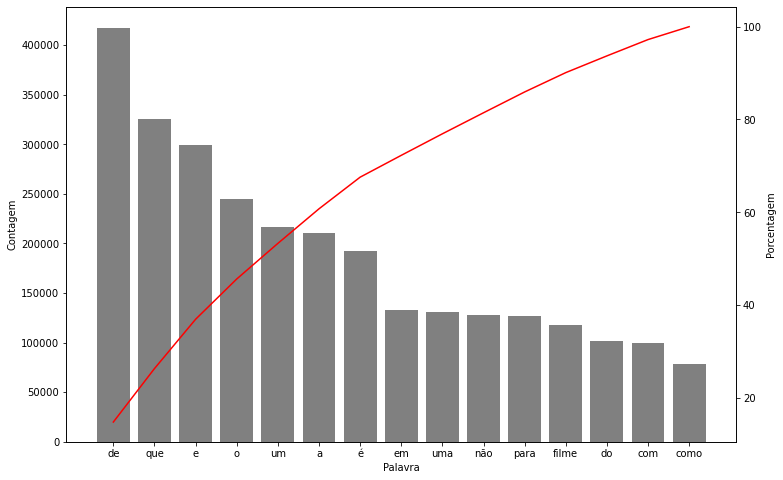

In [40]:
pareto(resenha, 'text_pt', 15)

In [41]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [42]:
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [43]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6607359482410028

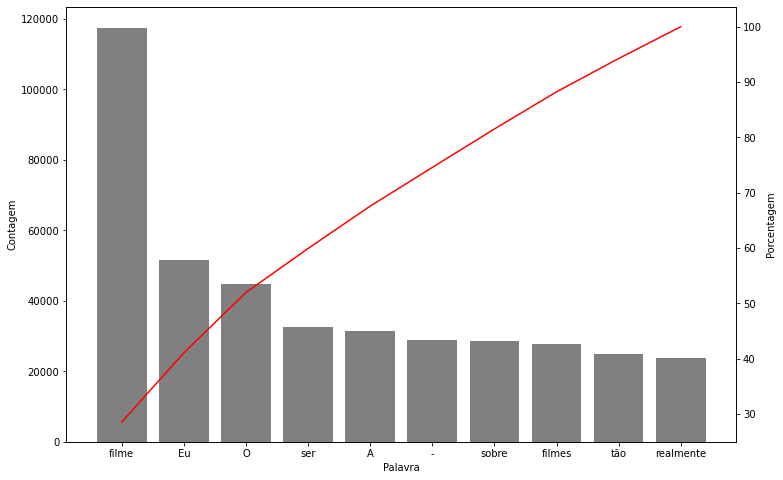

In [44]:
pareto(resenha, 'tratamento_1', 10)

# 2a Parte

In [45]:
from nltk import tokenize

frase = "olá mundo!"

token_pontuacao = tokenize.WordPunctTokenizer()

token_frase = token_pontuacao.tokenize(frase)
token_frase

['olá', 'mundo', '!']

In [46]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
pontuacao = [ponto for ponto in punctuation]

In [48]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha['tratamento_1']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in pontuacao_stopwords]
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada

resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


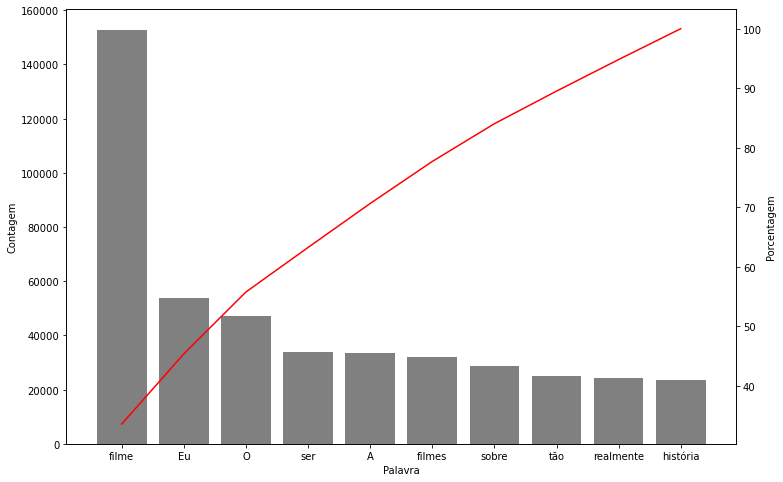

In [49]:
pareto(resenha, 'tratamento_2', 10)

In [50]:
import unidecode

acentos = "ótimo péssimo é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo e tao


In [51]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [52]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [53]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [54]:
frase_processada = list()
for opiniao in sem_acentos:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3'] = frase_processada

resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [55]:
resenha['tratamento_3'][0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [56]:
acuracia_tratamento3 = classificar_texto(resenha, 'tratamento_3', 'classificacao')
print(acuracia_tratamento3)

0.6810351799433886


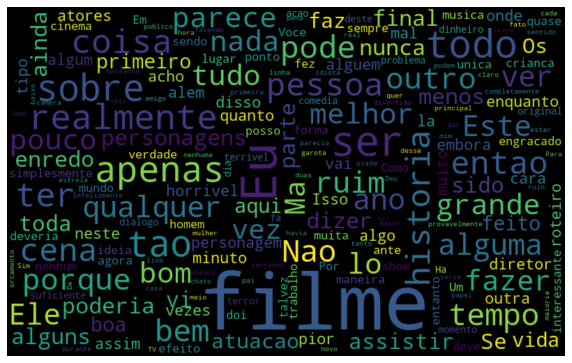

In [57]:
nuvem_palavras(resenha, 'tratamento_3', "'neg'")

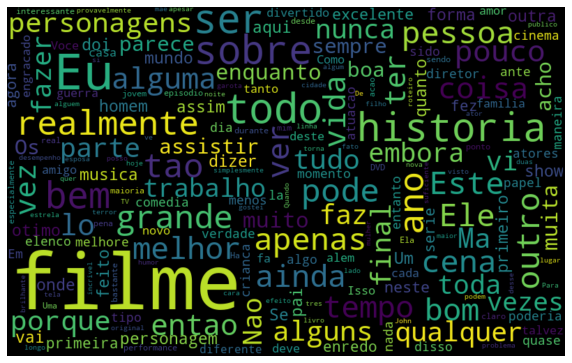

In [58]:
nuvem_palavras(resenha, 'tratamento_3', "'pos'")

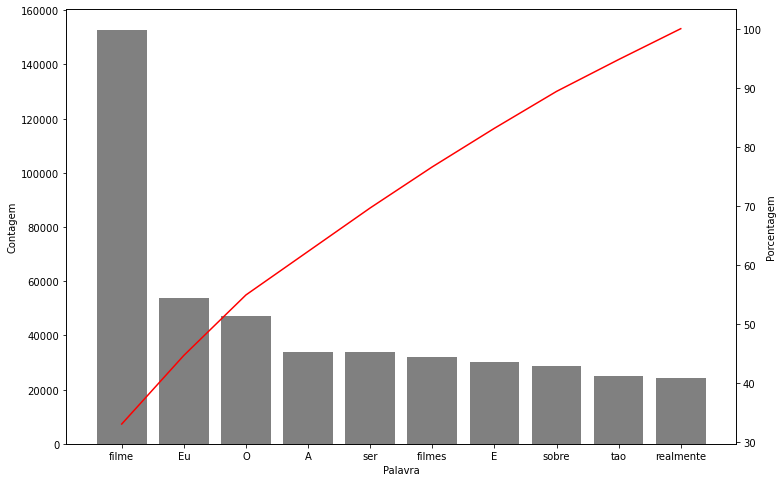

In [59]:
pareto(resenha, 'tratamento_3', 10)

In [60]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    palavras_texto = token_pontuacao.tokenize(opiniao.lower())
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [61]:
resenha['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [62]:
resenha['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [63]:
acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')

In [64]:
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6879094217549535
0.6810351799433886


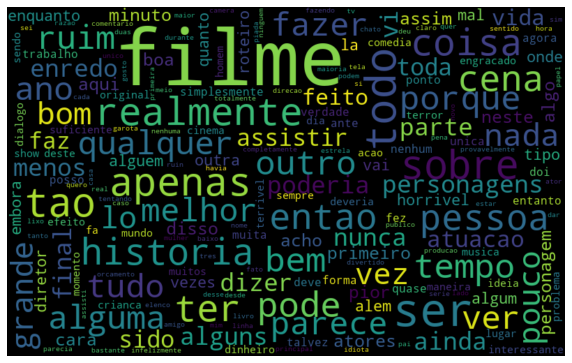

In [65]:
nuvem_palavras(resenha, 'tratamento_4', "'neg'")

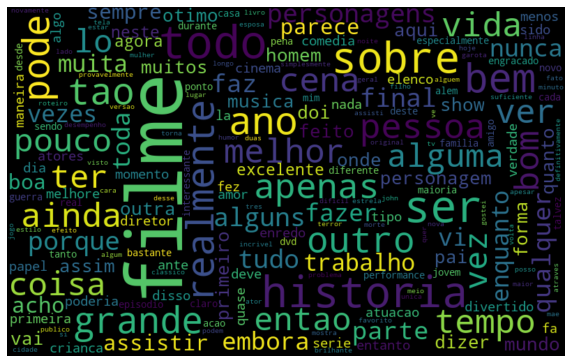

In [66]:
nuvem_palavras(resenha, 'tratamento_4', "'pos'")

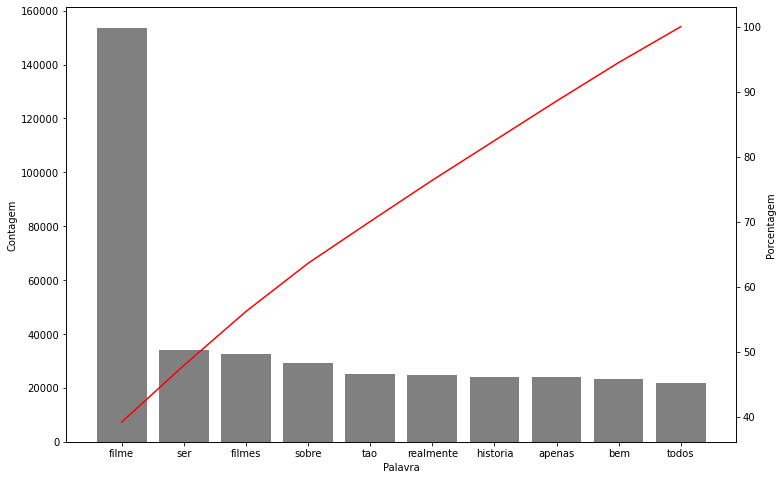

In [67]:
pareto(resenha, 'tratamento_4', 10)

In [68]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('correria')

'corr'

In [69]:
frase_processada = list()
for opiniao in resenha['tratamento_4']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [70]:
acuracia_tratamento5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')

In [71]:
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6943792964011323
0.6879094217549535


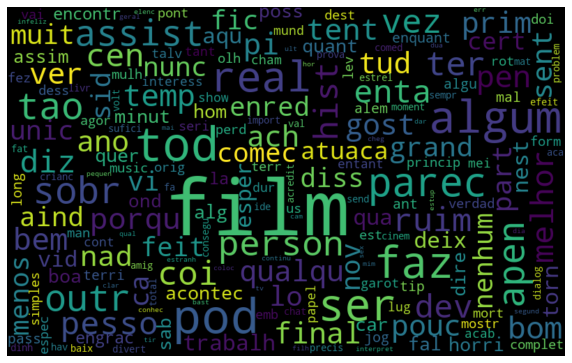

In [72]:
nuvem_palavras(resenha, 'tratamento_5', "'neg'")

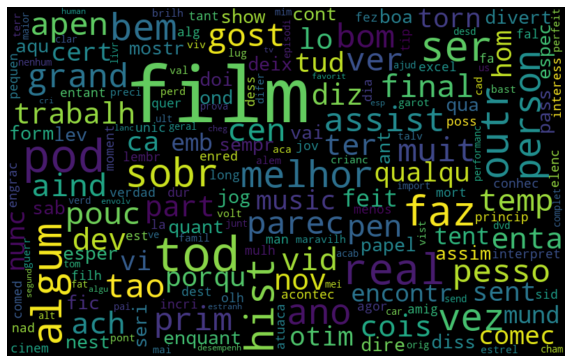

In [73]:
nuvem_palavras(resenha, 'tratamento_5', "'pos'")

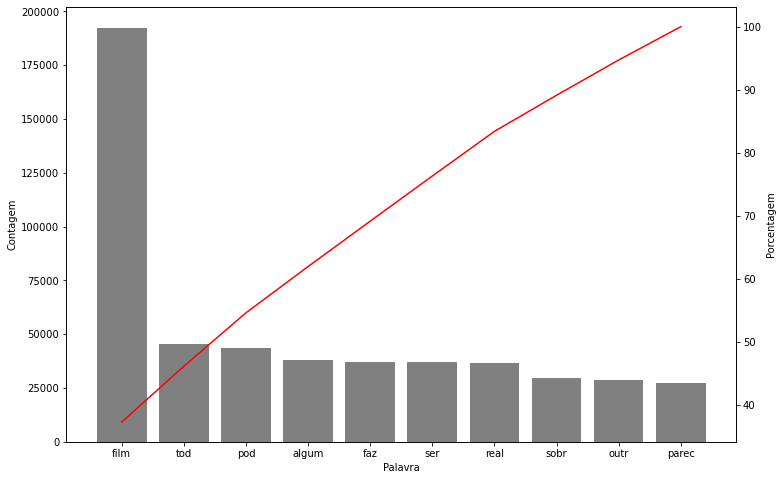

In [74]:
pareto(resenha, 'tratamento_5', 10)

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase = False, max_features = 50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns = tfidf.get_feature_names()
)

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [78]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, 
                                                              resenha['classificacao'], 
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)

NameError: name 'regressao_logisitca' is not defined

In [80]:
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [81]:
tfidf_tratado = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratado, 
                                                              resenha['classificacao'], 
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
acuracia_tfidf_tratado = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratado)

0.6988273352203801


In [86]:
from nltk import ngrams

In [88]:
frase = 'Assisti um ótimo filme.'
frase_separada = token_espaco.tokenize(frase)

pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [98]:
tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1, 2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, 
                                                              resenha['classificacao'],
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8858875859280226


In [102]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T,
                     index = tfidf.get_feature_names())

pesos.nlargest(50,0)

,0
otim,9.883148
excel,8.998212
perfeit,6.909051
maravilh,6.277557
favorit,5.888959
incri,5.746389
divert,5.411610
brilh,4.856989
ador,4.570598
hoj,4.491365


In [101]:
pesos.nsmallest(10, 0)

,0
ruim,-11.761766
pi,-11.424122
horri,-9.701481
terri,-8.386112
nad,-7.610627
chat,-7.508107
parec,-6.628180
nenhum,-6.369930
tent,-5.774706
mal,-5.710310


In [92]:
tfidf = TfidfVectorizer(lowercase = False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, 
                                                              resenha['classificacao'],
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.884270117266478


In [95]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T,
                     index = tfidf.get_feature_names())

pesos.nlargest(10,0)

,0
otim,8.294335
excel,7.978493
perfeit,6.578983
favorit,5.779011
maravilh,5.286352
incri,5.050027
hilari,4.657681
divert,4.582648
ador,4.423237
brilh,4.268384


In [97]:
pesos.nsmallest(10, 0)

,0
pi,-9.177651
ruim,-9.171537
horri,-8.752946
terri,-7.187079
chat,-6.918747
nad,-6.031319
infeliz,-5.309640
decepca,-4.998771
ridicul,-4.952619
nenhum,-4.920178
